****** EDA andFeature Engineering *******

In [174]:
import pandas as pd

In [175]:
df= pd.read_csv(r"C:/Zomato delivery/notebook/data/finalTrain.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [177]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [178]:
import geopy
from geopy.distance import geodesic

# Assuming 'df' is your DataFrame with the mentioned columns

# Function to calculate distance for each row
def calculate_distance(row):
    restaurant_coords = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_coords = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return geodesic(restaurant_coords, delivery_coords).kilometers


df['Distance (in KM)'] = df.apply(calculate_distance, axis=1)

df.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance (in KM)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.927795
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484


In [179]:
df[categorical_columns].describe()

,Weather_conditions,Road_traffic_density,Type_of_vehicle,Festival,City
count,44968,44983,45584,45356,44384
unique,6,4,4,2,3
top,Fog,Low,motorcycle,No,Metropolitian
freq,7653,15476,26429,44460,34087


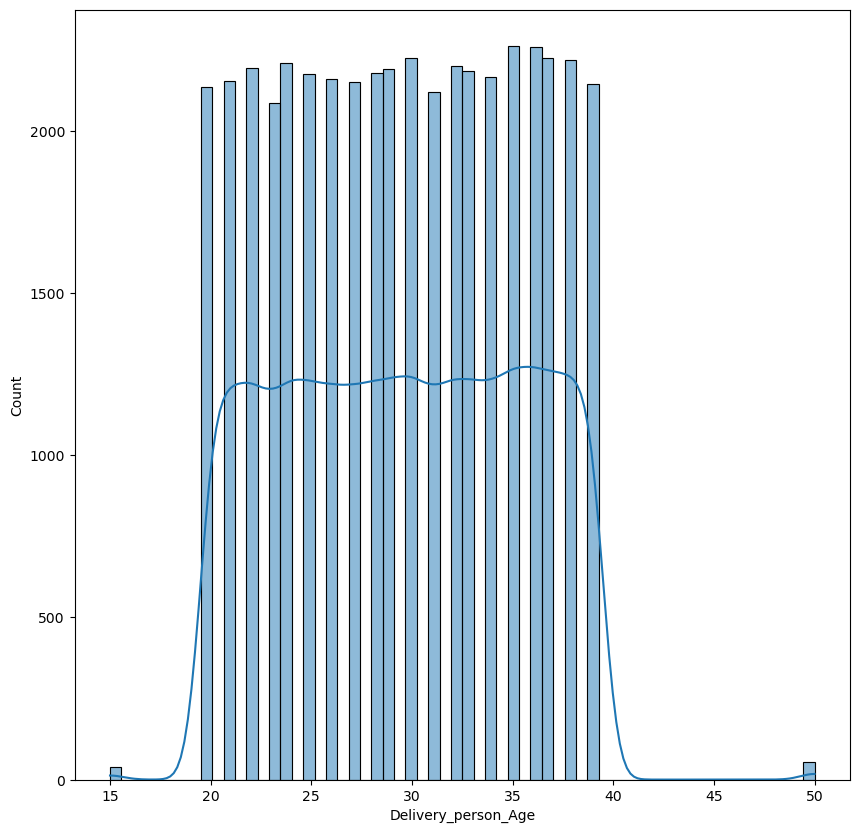

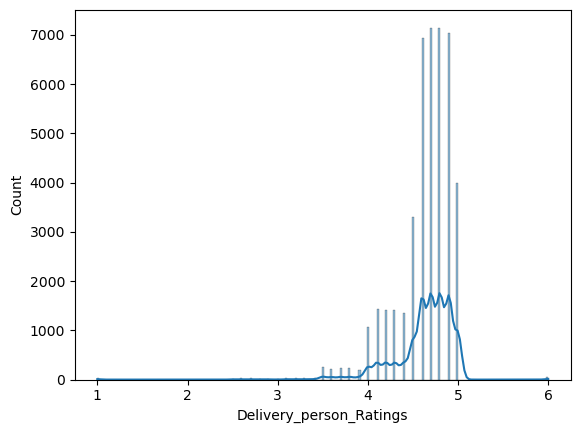

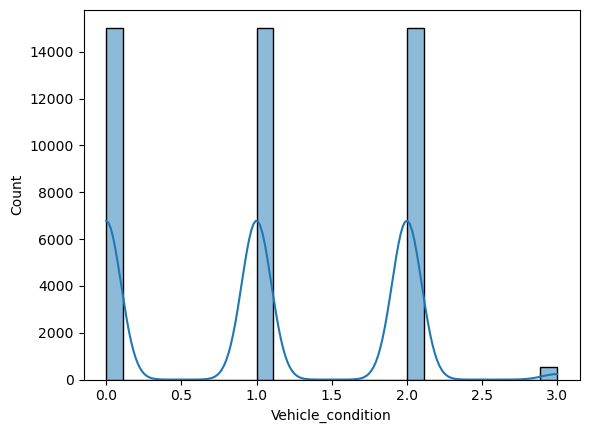

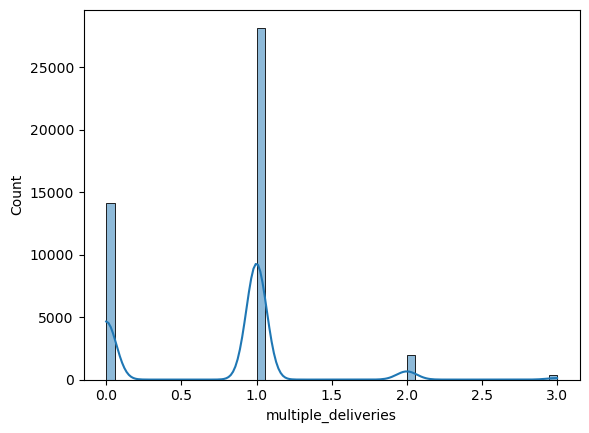

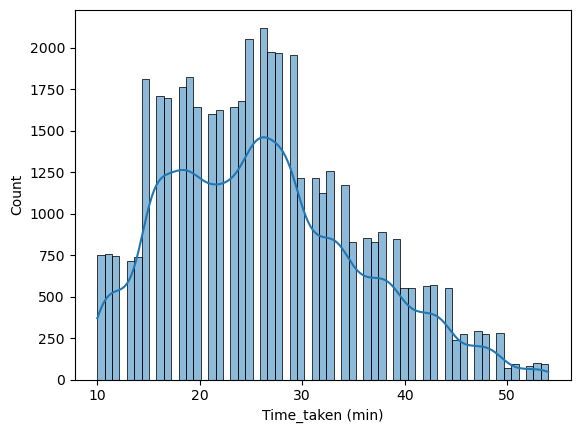

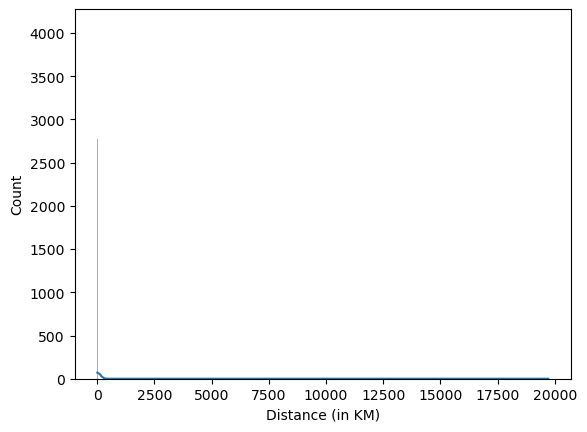

In [180]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [181]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance (in KM)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.927795
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484


In [182]:
df.drop(columns=["ID","Delivery_person_ID","Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude","Order_Date","Time_Orderd","Time_Order_picked","Type_of_order"],axis=1,inplace=True)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance (in KM)
0,36.0,4.2,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,46,10.271464
1,21.0,4.7,Stormy,High,1,motorcycle,1.0,No,Metropolitian,23,6.229376
2,23.0,4.7,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,21,13.764306
3,34.0,4.3,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,20,2.927795
4,24.0,4.7,Fog,Jam,1,scooter,1.0,No,Metropolitian,41,19.373484


In [183]:
numerical_columns=df.columns[df.dtypes!="object"]
categorical_columns=df.columns[df.dtypes=="object"]

print("Numerical columns: ", numerical_columns)
print("Catergorical columns: ",  categorical_columns)

Numerical columns:  Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Distance (in KM)'],
      dtype='object')
Catergorical columns:  Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_vehicle',
       'Festival', 'City'],
      dtype='object')


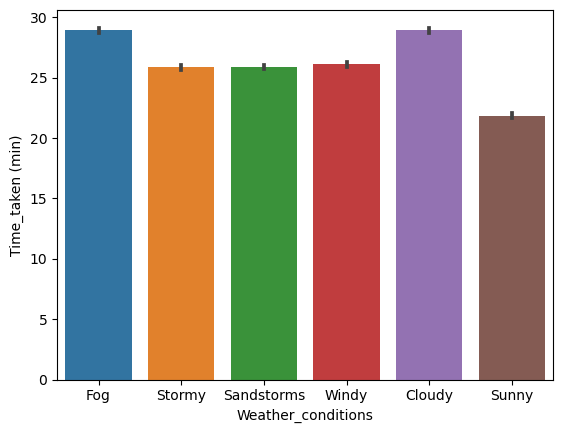

In [184]:
ax=sns.barplot(x="Weather_conditions", y="Time_taken (min)", data=df)


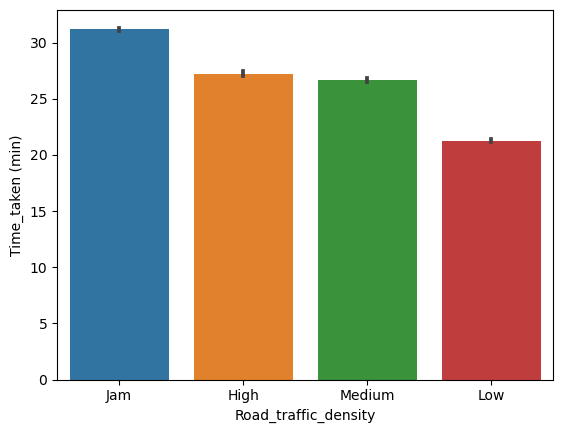

In [185]:
ax=sns.barplot(x="Road_traffic_density", y="Time_taken (min)", data=df)


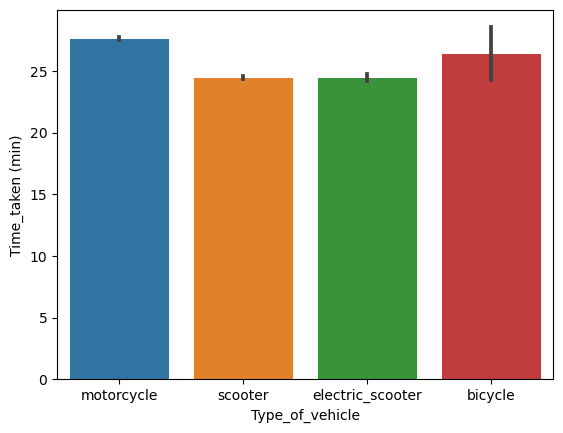

In [186]:
ax=sns.barplot(x="Type_of_vehicle", y="Time_taken (min)", data=df)


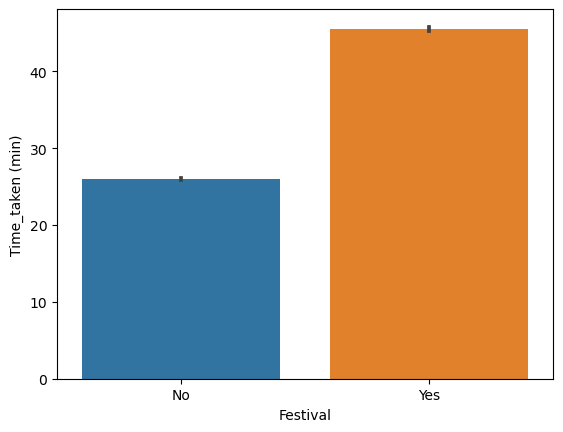

In [187]:
ax=sns.barplot(x="Festival", y="Time_taken (min)", data=df)


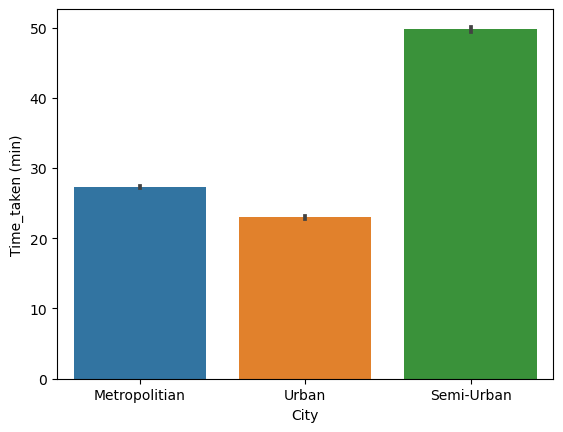

In [188]:
ax=sns.barplot(x="City", y="Time_taken (min)", data=df)


In [189]:
weather_condition_map={"Sunny":1,"Stormy":2,"Sandstorms":3,"Windy":4,"Fog":5,"Cloudy":6}
road_traffic_map={"Low":1,"Medium":2,"High":3,"Jam":4}
type_of_vehicle_map={"electric scooter":1, "scooter":2,"bicycle":3,"motorcycle":4}
festival_map={"No":1,"Yes":2}
city_map={"Urban":1,"Metropolitian":2, "Semi-Urban":3}

In [190]:
df["Weather_conditions"]=df["Weather_conditions"].map(weather_condition_map)
df["Road_traffic_density"]=df["Road_traffic_density"].map(road_traffic_map)
df["Type_of_vehicle"]=df["Type_of_vehicle"].map(type_of_vehicle_map)
df["Festival"]=df["Festival"].map(festival_map)
df["City"]=df["City"].map(city_map)



In [192]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance (in KM)
0,36.0,4.2,5.0,4.0,2,4.0,3.0,1.0,2.0,46,10.271464
1,21.0,4.7,2.0,3.0,1,4.0,1.0,1.0,2.0,23,6.229376
2,23.0,4.7,3.0,2.0,1,2.0,1.0,1.0,2.0,21,13.764306
3,34.0,4.3,3.0,1.0,0,4.0,0.0,1.0,2.0,20,2.927795
4,24.0,4.7,5.0,4.0,1,2.0,1.0,1.0,2.0,41,19.373484


In [193]:
df.isnull().sum()

Delivery_person_Age        1854
Delivery_person_Ratings    1908
Weather_conditions          616
Road_traffic_density        601
Vehicle_condition             0
Type_of_vehicle            3814
multiple_deliveries         993
Festival                    228
City                       1200
Time_taken (min)              0
Distance (in KM)              0
dtype: int64

In [195]:
df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mean(), inplace=True)
df['multiple_deliveries'].fillna(df['multiple_deliveries'].mean(), inplace=True)
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].mean(), inplace=True)

df['Weather_conditions'].fillna(df['Weather_conditions'].mode()[0], inplace=True)
df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)




In [196]:
df.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Weather_conditions         0
Road_traffic_density       0
Vehicle_condition          0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Time_taken (min)           0
Distance (in KM)           0
dtype: int64

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45584 non-null  float64
 1   Delivery_person_Ratings  45584 non-null  float64
 2   Weather_conditions       45584 non-null  float64
 3   Road_traffic_density     45584 non-null  float64
 4   Vehicle_condition        45584 non-null  int64  
 5   Type_of_vehicle          45584 non-null  float64
 6   multiple_deliveries      45584 non-null  float64
 7   Festival                 45584 non-null  float64
 8   City                     45584 non-null  float64
 9   Time_taken (min)         45584 non-null  int64  
 10  Distance (in KM)         45584 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 3.8 MB


***** Model Training *********

In [198]:
from  sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [199]:
X=df.drop(labels=["Time_taken (min)"], axis=1)
Y= df[["Time_taken (min)"]]

In [200]:
##Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.30, random_state=40)